These are examples of the use of package "SixSigma" https://www.sixsigmawithr.com/

In [3]:
#!install.packages("SixSigma")

In [4]:
require(SixSigma)

# Loss Funtion Analysis

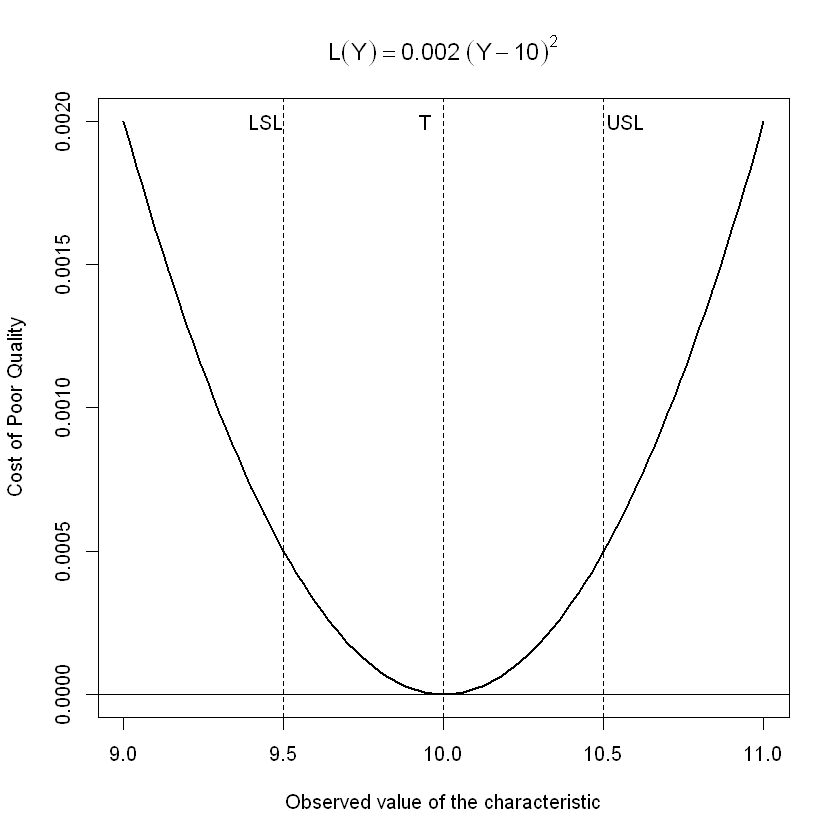

In [9]:
curve(0.002 * (x - 10)^2, 9, 11,
    lty = 1,
    lwd = 2,
    ylab = "Cost of Poor Quality",
    xlab = "Observed value of the characteristic",
    main = expression(L(Y) == 0.002 ~ (Y - 10)^2))
abline(v = 9.5, lty = 2)
abline(v = 10.5, lty = 2)
abline(v = 10, lty = 2)
abline(h = 0)
text(10, 0.002, "T", adj = 2)
text(9.5, 0.002, "LSL", adj = 1)
text(10.5, 0.002, "USL", adj = -0.1)

$lfa.k
[1] 0.004

$lfa.lf
expression(bold(L == 0.004 %.% (Y - 10)^2))

$lfa.MSD
[1] 0.03372065

$lfa.avLoss
[1] 0.0001348826

$lfa.Loss
[1] 13.48826


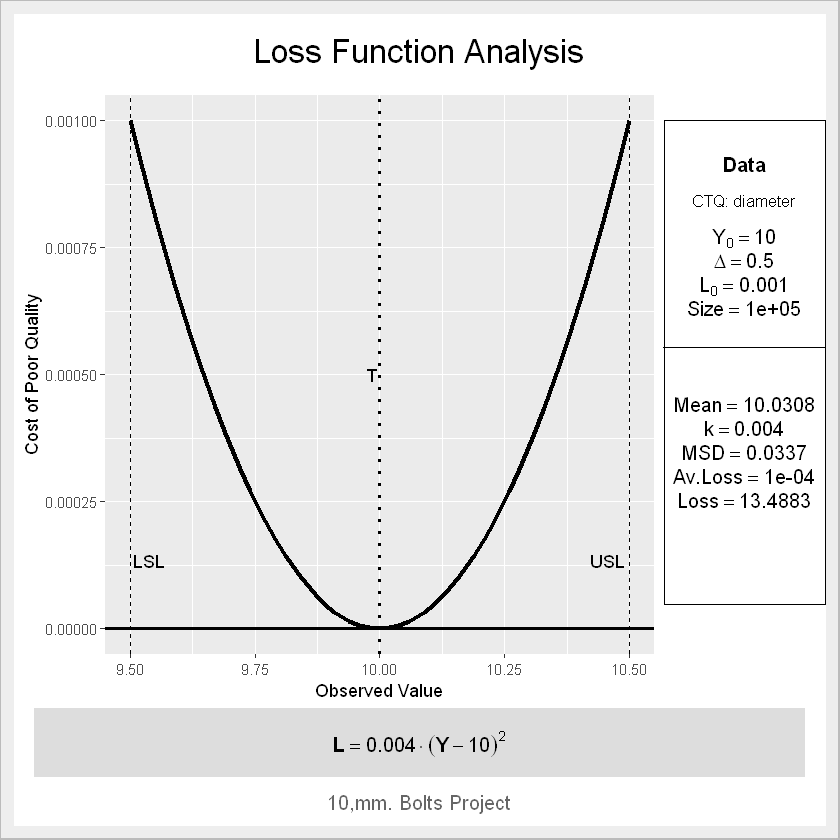

In [11]:
ss.lfa(ss.data.bolts, "diameter", 0.5, 10, 0.001,
lfa.sub = "10,mm. Bolts Project",
lfa.size = 100000, lfa.output = "both")

# Tools for Measure Phase

In [12]:
voltmeter <- factor(rep(1:2, each = 9))
battery <- factor(rep(rep(1:3, each = 3), 2))
run <- factor(rep(1:3, 6))
voltage <- c(1.4727, 1.4206, 1.4754, 1.5083, 1.5739,
    1.4341, 1.5517, 1.5483, 1.4614, 1.3337,
    1.6078, 1.4767, 1.4066, 1.5951, 1.8419,
    1.7087, 1.8259, 1.5444)
batteries <- data.frame(voltmeter, battery,
    run, voltage)

In [13]:
anova(lm(voltage ~ battery + voltmeter + battery * voltmeter, data = batteries))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
battery,2,0.06308175,0.031540875,1.9939330,0.1787905
voltmeter,1,0.04444174,0.044441742,2.8094926,0.1195450
battery:voltmeter,2,0.01847247,0.009236237,0.5838912,0.5728114
Residuals,12,0.18982107,0.015818423,NA,NA


In [14]:
anova(lm(voltage ~ battery + voltmeter + battery * voltmeter, data=batteries))[3][4,1]

[1] 0.01581842

Complete model (with interaction):

                  Df  Sum Sq Mean Sq F value Pr(>F)
battery            2 0.06308 0.03154   3.415  0.227
voltmeter          1 0.04444 0.04444   4.812  0.160
battery:voltmeter  2 0.01847 0.00924   0.584  0.573
Repeatability     12 0.18982 0.01582               
Total             17 0.31582                       

alpha for removing interaction: 0.05 


Reduced model (without interaction):

              Df  Sum Sq Mean Sq F value Pr(>F)
battery        2 0.06308 0.03154   2.120  0.157
voltmeter      1 0.04444 0.04444   2.987  0.106
Repeatability 14 0.20829 0.01488               
Total         17 0.31582                       

Gage R&R

                      VarComp %Contrib
Total Gage R&R    0.018162959    86.74
  Repeatability   0.014878111    71.05
  Reproducibility 0.003284848    15.69
    voltmeter     0.003284848    15.69
Part-To-Part      0.002777127    13.26
Total Variation   0.020940086   100.00

                      StdDev  StudyVar %StudyVar

Warning message in widths.x[pos.widths[[nm]]] <- widths.settings[[nm]] * widths.defaults[[nm]]$x:
"number of items to replace is not a multiple of replacement length"

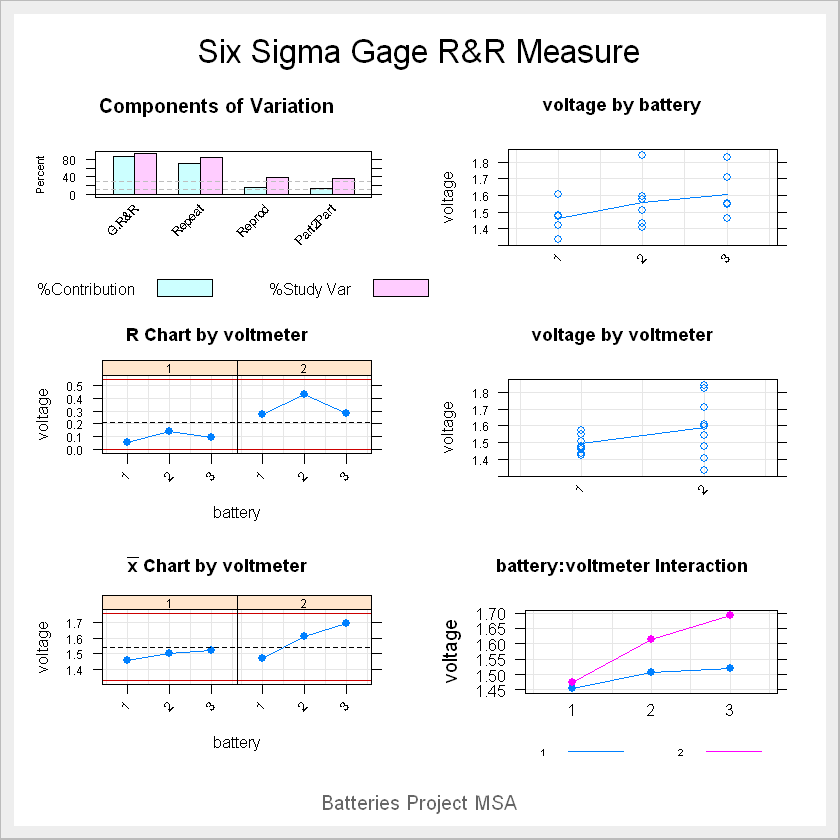

In [15]:
my.rr <- ss.rr(var = voltage, part = battery,
    appr = voltmeter,
    data = batteries,
    main = "Six Sigma Gage R&R Measure",
    sub = "Batteries Project MSA")

# Pareto Analysis

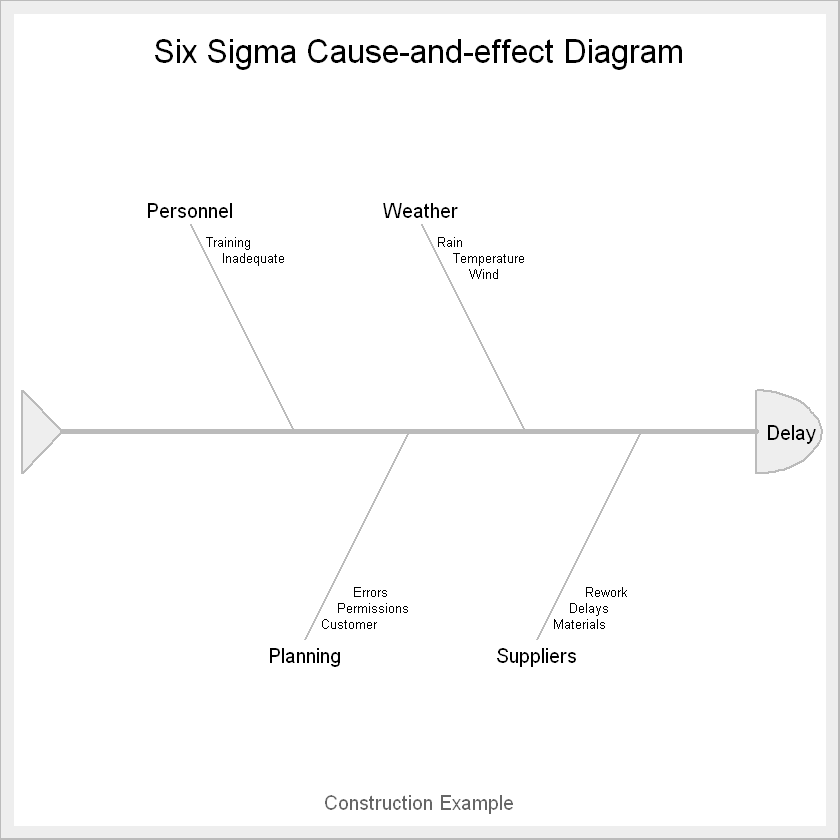

In [17]:
b.effect <- "Delay"
b.groups <- c("Personnel", "Weather", "Suppliers", "Planning")
b.causes <- vector(mode = "list", length = length(b.groups))
b.causes[1] <- list(c("Training", "Inadequate"))
b.causes[2] <- list(c("Rain", "Temperature", "Wind"))
b.causes[3] <- list(c("Materials", "Delays", "Rework"))
b.causes[4] <- list(c("Customer", "Permissions", "Errors"))
ss.ceDiag(b.effect,b.groups, b.causes, sub = "Construction Example")

In [18]:
b.data <- data.frame(cause=factor(unlist(b.causes)),
    count = c(5,1,3,1,2,18,20,4,15,2,4),
    cost = c(50,150,50,10,20,180,200,10,5,20,150))

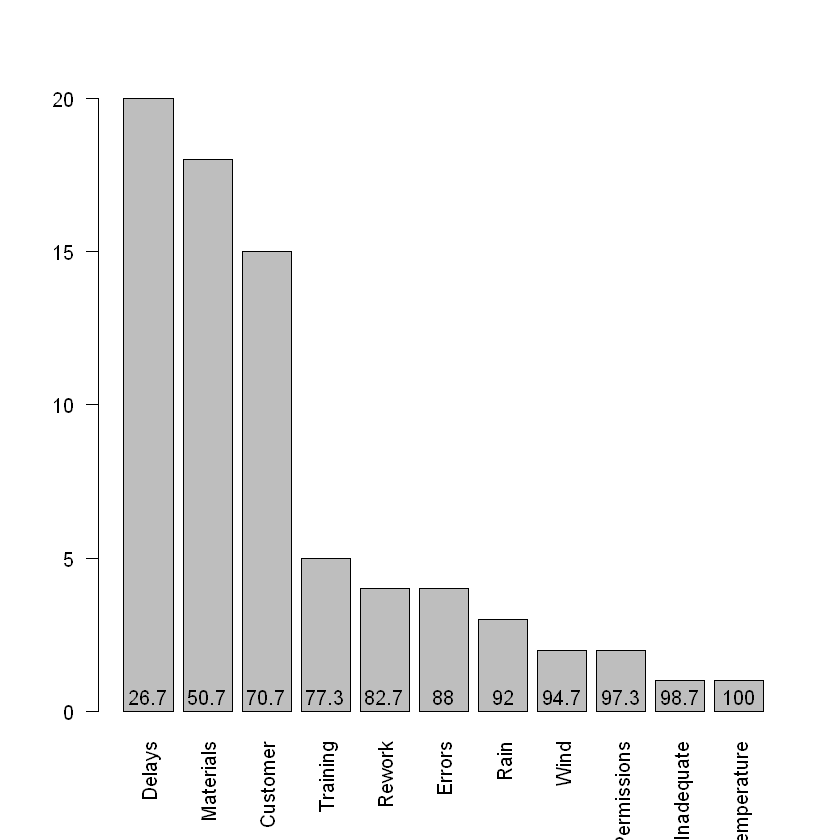

In [19]:
pChart <- barplot(rev(sort(b.data$count)),
    names.arg = b.data$cause[order(b.data$count,
    decreasing = TRUE)],
    las = 2)
text(pChart,
    rep(0.5,11),
    sort(round(cumsum(100 * (b.data$count/sum(b.data$count))[
    order(b.data$count, decreasing = TRUE)]), 1)))

Warning message:
"package 'qcc' was built under R version 3.6.3"Package 'qcc' version 2.7
Type 'citation("qcc")' for citing this R package in publications.


             
Pareto chart analysis for b.vector
               Frequency  Cum.Freq. Percentage Cum.Percent.
  Delays       20.000000  20.000000  26.666667    26.666667
  Materials    18.000000  38.000000  24.000000    50.666667
  Customer     15.000000  53.000000  20.000000    70.666667
  Training      5.000000  58.000000   6.666667    77.333333
  Rework        4.000000  62.000000   5.333333    82.666667
  Errors        4.000000  66.000000   5.333333    88.000000
  Rain          3.000000  69.000000   4.000000    92.000000
  Wind          2.000000  71.000000   2.666667    94.666667
  Permissions   2.000000  73.000000   2.666667    97.333333
  Inadequate    1.000000  74.000000   1.333333    98.666667
  Temperature   1.000000  75.000000   1.333333   100.000000

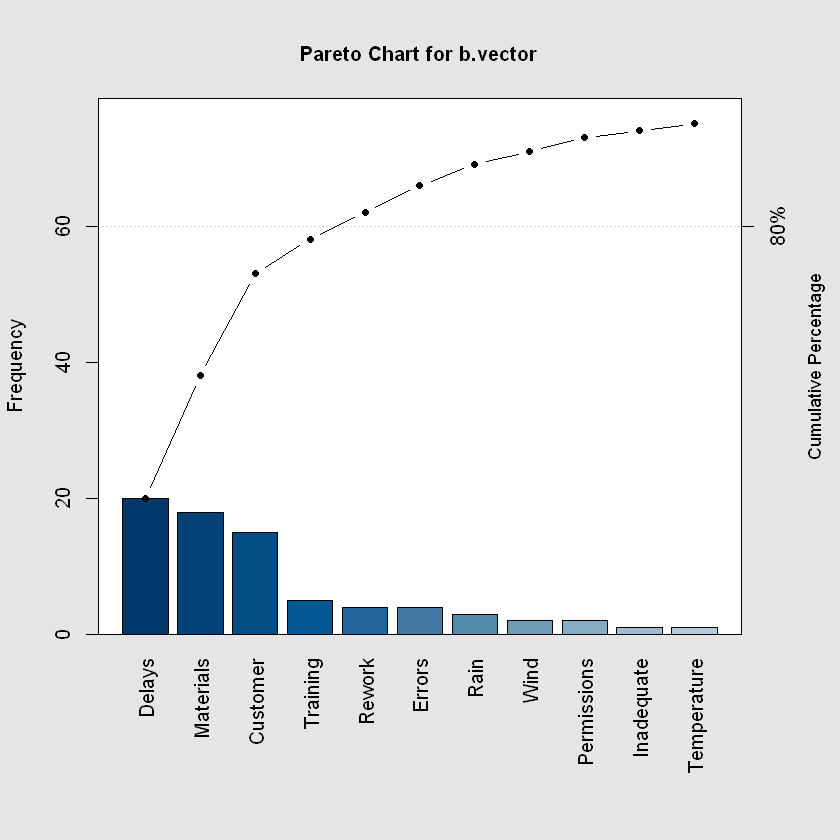

In [20]:
library(qcc)
b.vector <- b.data$count
names(b.vector) <- b.data$cause
pareto.chart(b.vector, cumperc = c(80))

# Process Capability

In [23]:
ss.ca.yield(c(3, 5, 12), c(1, 2, 4), 1915)

Yield,FTY,RTY,DPU,DPMO
0.9895561,0.9859008,0.9859563,20,10443.86


In [24]:
x<-c(755.81, 750.54, 751.05, 749.52, 749.21, 748.38,
    748.11, 753.07, 749.56, 750.08, 747.16, 747.53,
    749.22, 746.76, 747.64, 750.46, 749.27, 750.33,
    750.26, 751.29)
ss.ca.z(x,740,760)

[1] 4.639539

In [25]:
ss.ca.cp(x,740, 760)

[1] 1.584136

In [26]:
ss.ca.cpk(x,740, 760)

[1] 1.546513

In [33]:
ss.ca.cp(x, 740, 760, ci = TRUE)

[1] 1.084600 2.083046

In [28]:
ss.ca.cpk(x, 740, 760, ci = TRUE)

[1] 1.033560 2.059466

## Capability Study

Warning message in ss.study.ca(x, LSL = 740, USL = 760, Target = 750, alpha = 0.5, :
"Normality test/s failed"

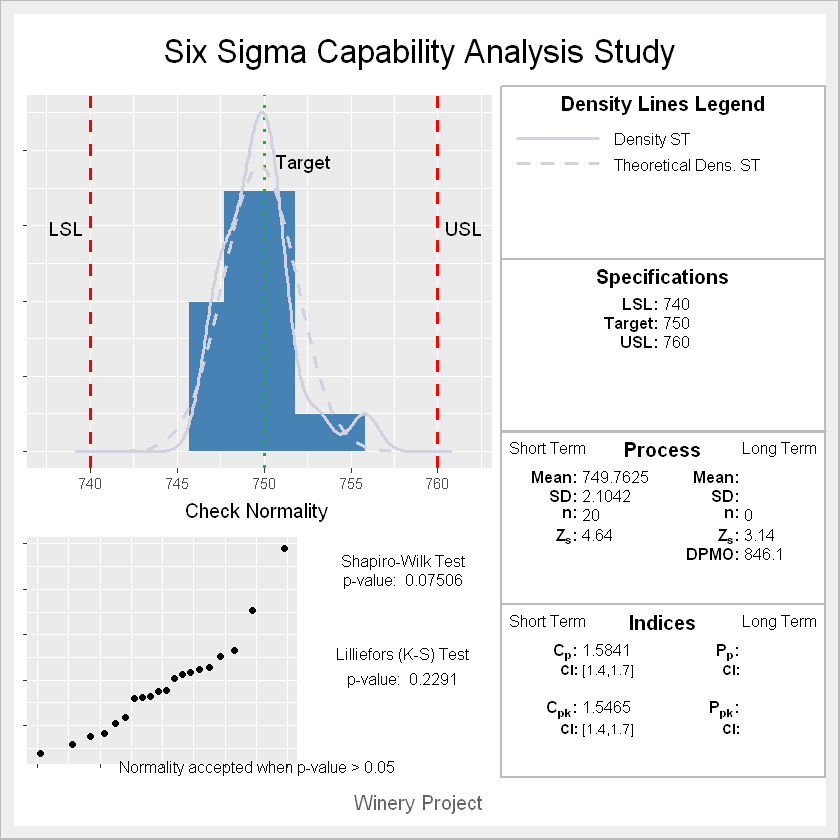

In [34]:
ss.study.ca(x, LSL = 740, USL = 760,
    Target = 750, alpha = 0.5,
    f.su = "Winery Project")

# Analyze phase

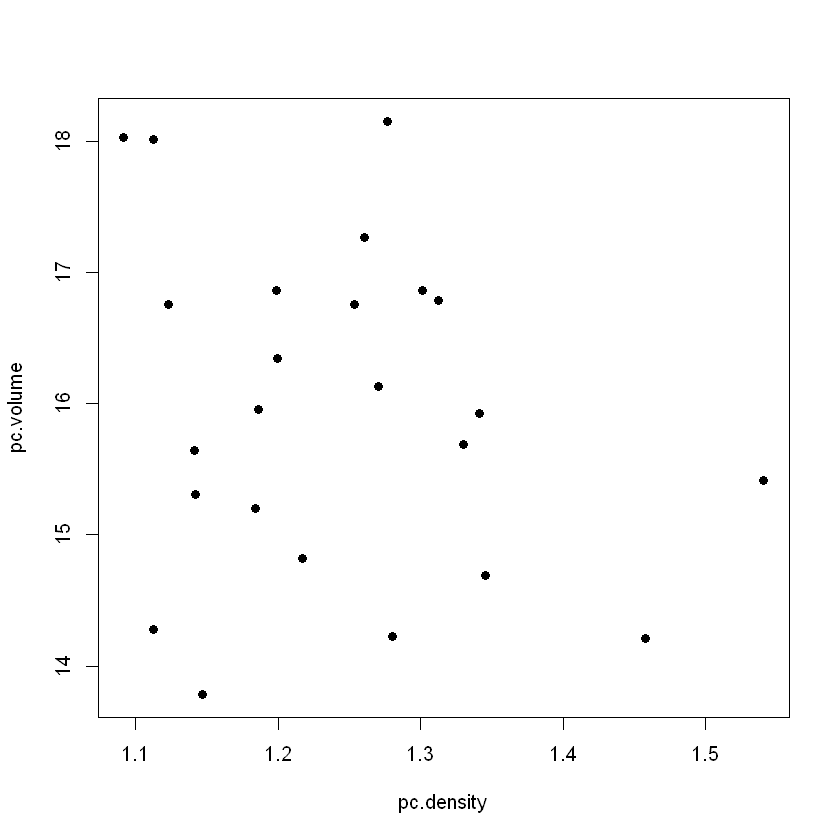

In [35]:
plot(pc.volume ~ pc.density,
    data = ss.data.pc,
    pch = 16)

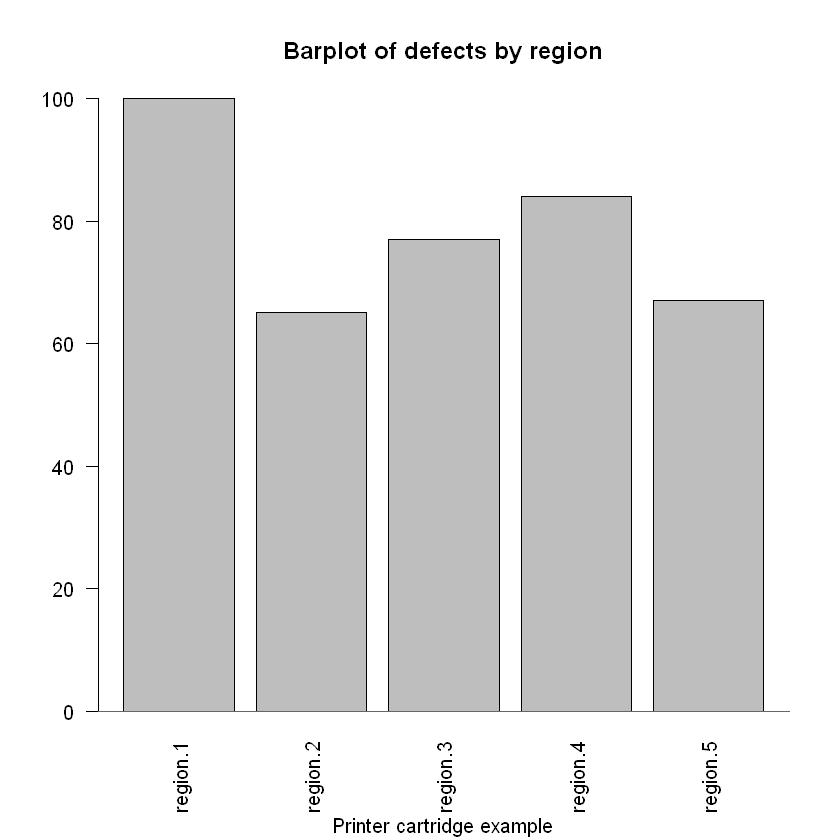

In [36]:
with(ss.data.pc.r,
    barplot(pc.def,
    names.arg = pc.regions,
    las = 2,
    main = "Barplot of defects by region",
    sub = "Printer cartridge example"))
abline(h = 0,
    col = "#666666")

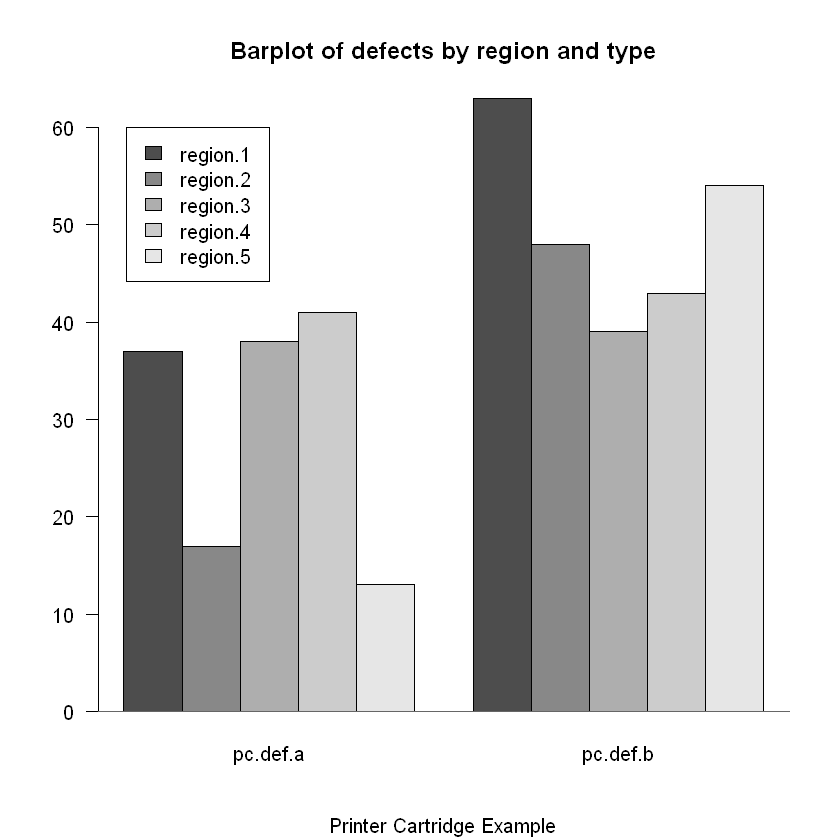

In [37]:
barplot(as.matrix(ss.data.pc.r[,2:3]),
    las = 1,
    beside = TRUE,
    legend = ss.data.pc.r[,1],
    args.legend = list(x=3.5,y=60),
    main = "Barplot of defects by region and type",
    sub = "Printer Cartridge Example")
abline(h = 0,
    col = "#666666")

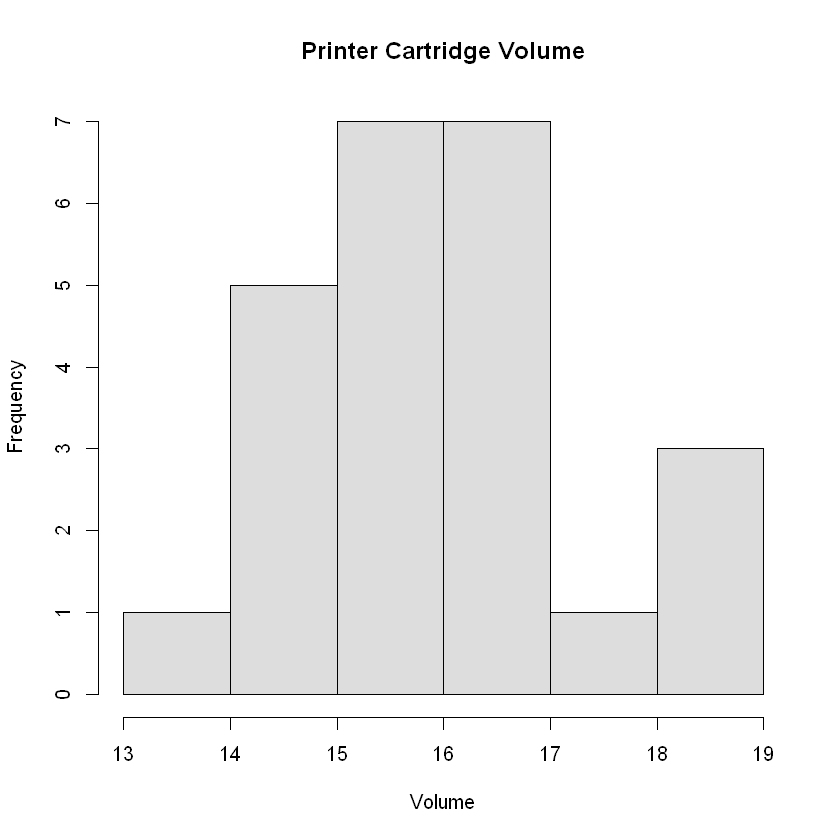

In [38]:
hist(ss.data.pc$pc.volume,
    main="Printer Cartridge Volume",
    xlab="Volume",
    col="#DDDDDD")

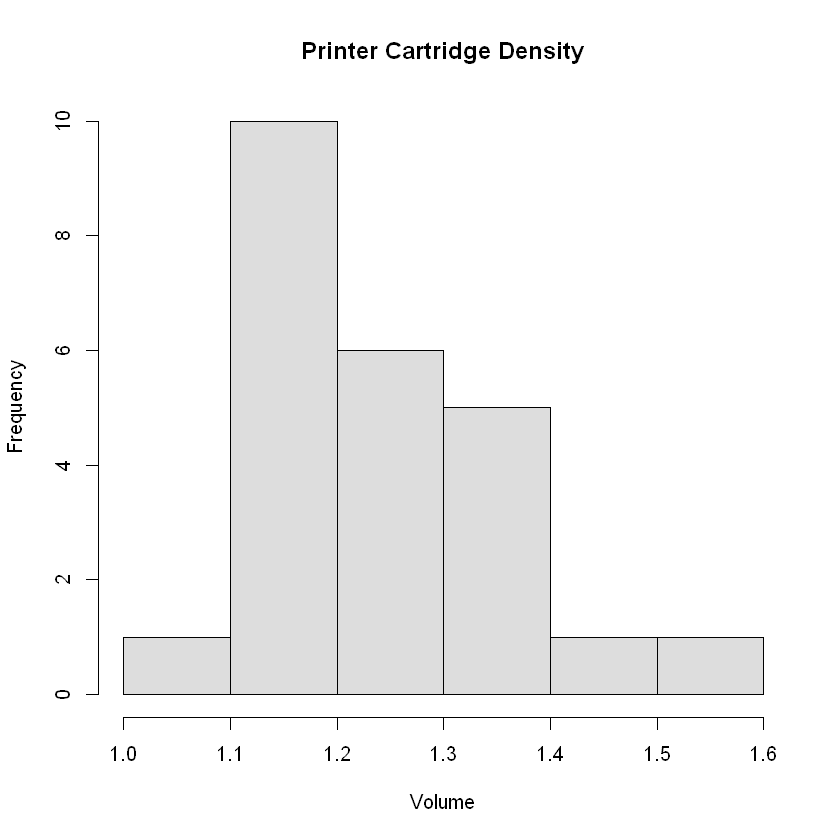

In [39]:
hist(ss.data.pc$pc.density,
    breaks = "FD",
    main = "Printer Cartridge Density",
    xlab = "Volume",
    col = "#DDDDDD")

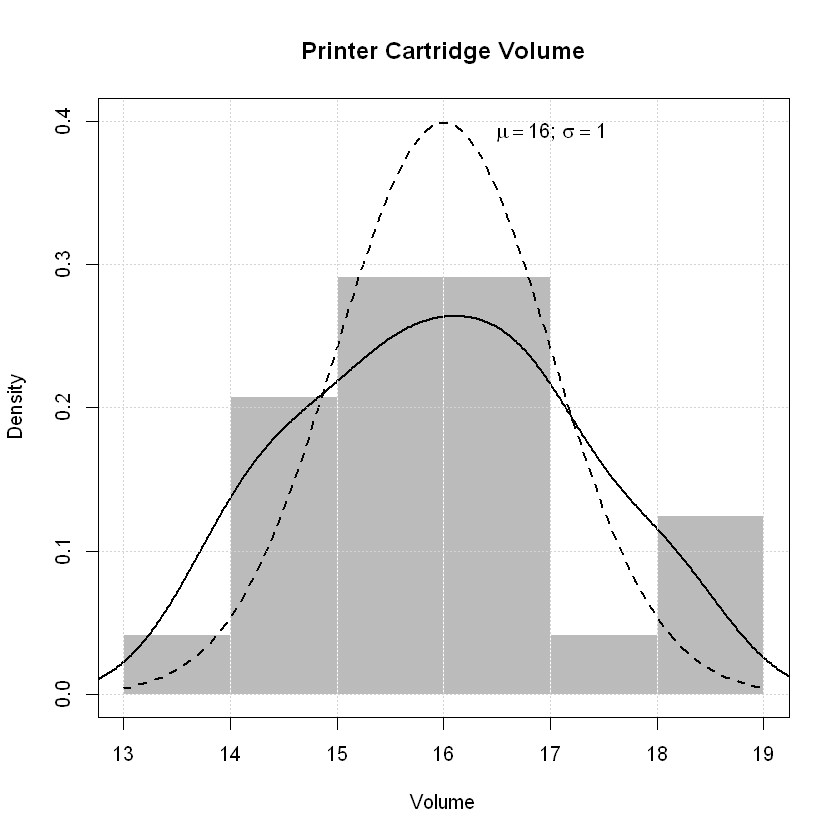

In [40]:
hist(ss.data.pc$pc.volume,
    main = "Printer Cartridge Volume",
    xlab = "Volume",
    col = "#BBBBBB",
    border = "white",
    bg = "red",
    freq = FALSE,
    ylim = c(0,0.4))
curve(dnorm(x,16,1),
    add = TRUE,
    lty = 2,
    lwd = 2)
lines(density(ss.data.pc$pc.volume),
    lwd = 2)
text(label = expression(paste(mu==16,
    "; ",
    sigma==1,
    sep = "")),
    x = 16.5,
    y = 0.4,
    adj = c(0,1))
grid()
box()

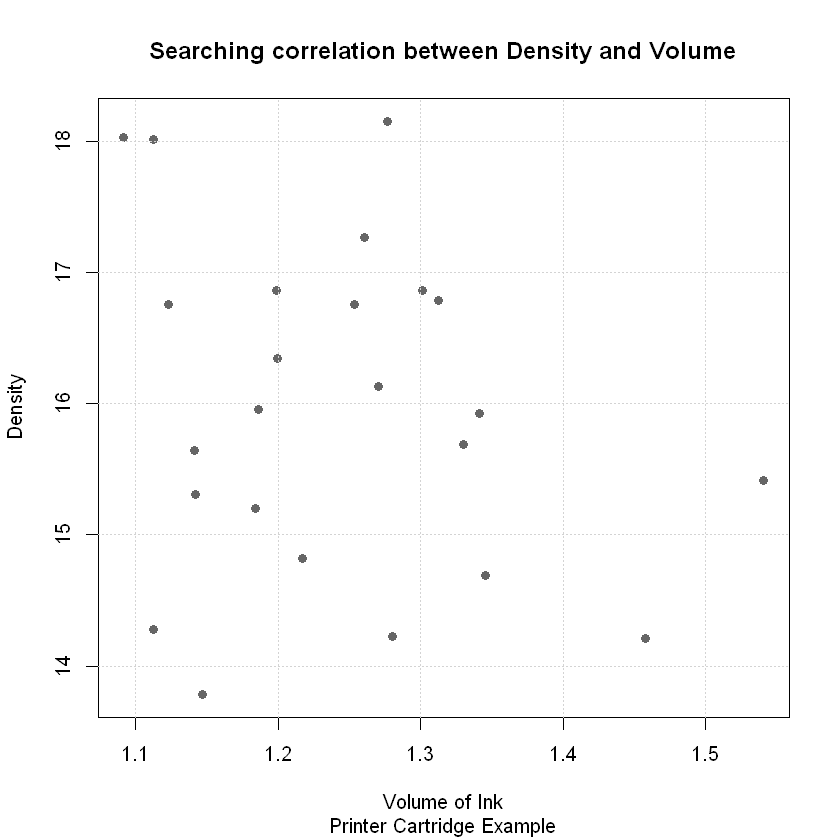

In [41]:
plot(pc.volume ~ pc.density,
    data = ss.data.pc,
    main = "Searching correlation between Density and Volume",
    col = "#666666",
    pch = 16,
    sub = "Printer Cartridge Example",
    xlab = "Volume of Ink",
    ylab = "Density")
grid()

## Run Charts

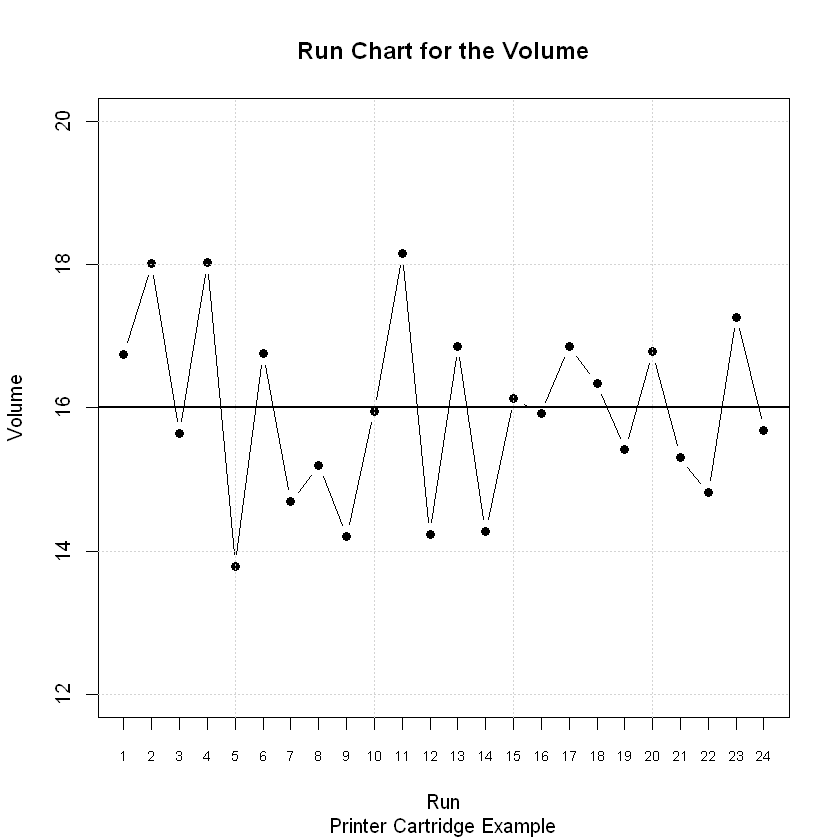

In [42]:
plot(ss.data.pc$pc.volume,
    type = "b",
    pch = 16,
    ylim = c(12,20),
    axes = FALSE,
    main = "Run Chart for the Volume",
    sub = "Printer Cartridge Example",
    xlab = "Run",
    ylab = "Volume")
axis(1,
    at = 1:24,
    cex.axis = 0.7)
axis(2)
box()
grid()
abline(h = 16,
    lwd = 2)

## Tier Chart

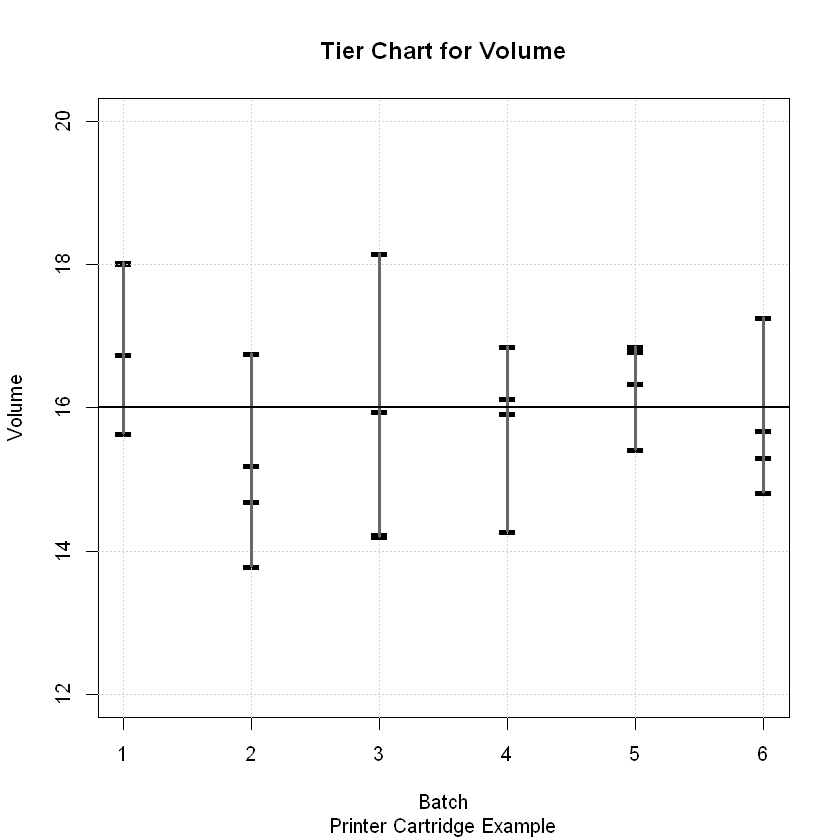

In [43]:
stripchart(pc.volume ~ pc.batch,
    data = ss.data.pc,
    pch = "-",
    cex = 3,
    xlab = "Batch",
    ylab = "Volume",
    ylim = c(12,20),
    vertical = TRUE,
    main = "Tier Chart for Volume",
    sub = "Printer Cartridge Example")
grid()
for (i in 1:6){
    lines(x = rep(i,2),
    lwd = 3,
    col = "#666666",
    y = c(max(ss.data.pc$pc.volume[
    ss.data.pc$pc.batch==i]),
    min(ss.data.pc$pc.volume[
    ss.data.pc$pc.batch==i])))
    }
abline(h = 16, lwd = 2)

## Box-whisker chart

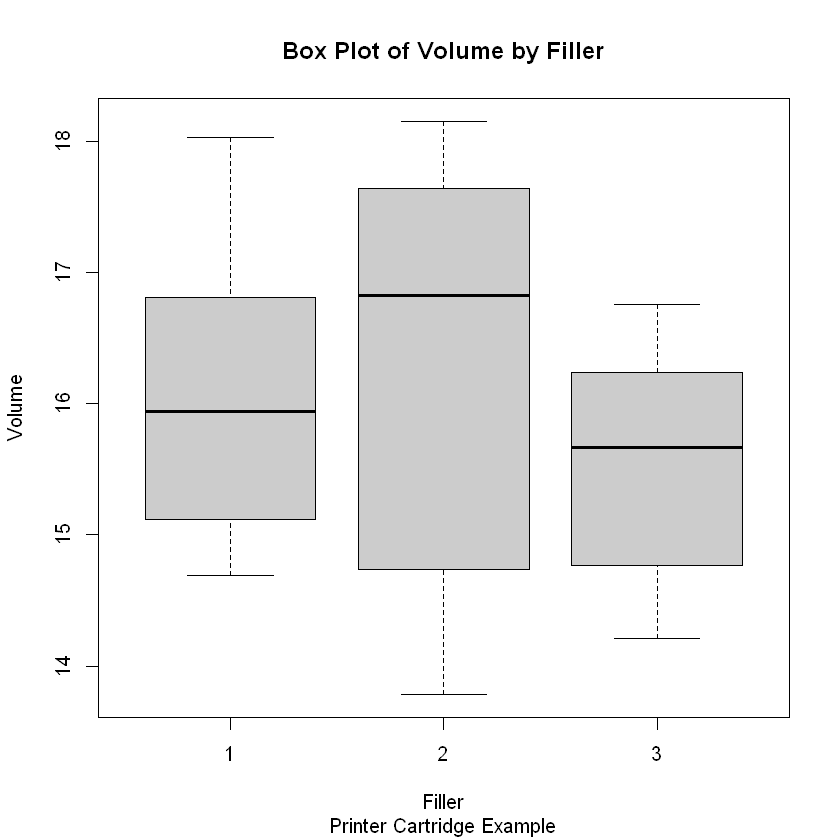

In [44]:
boxplot(pc.volume ~ pc.filler,
    data = ss.data.pc,
    col = "#CCCCCC",
    main = "Box Plot of Volume by Filler",
    sub = "Printer Cartridge Example",
    xlab = "Filler",
    ylab = "Volume")

List of 6
 $ stats: num [1:5, 1] 13.8 15 15.9 16.8 18
 $ n    : num 24
 $ conf : num [1:2, 1] 15.4 16.5
 $ out  : num 18.2
 $ group: num 1
 $ names: chr ""


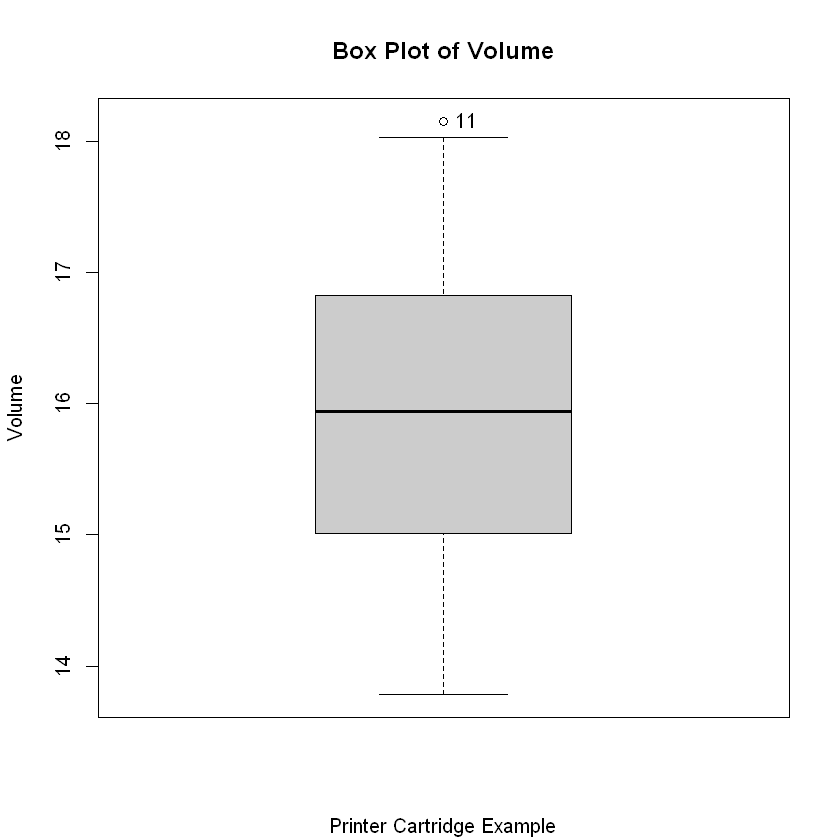

In [45]:
my.bp <- boxplot(ss.data.pc$pc.volume,
    col = "#CCCCCC",
    main = "Box Plot of Volume",
    sub = "Printer Cartridge Example",
    ylab = "Volume",
    range = 0.7)
text (x = rep(1, length(my.bp$out)),
    y = my.bp$out,
    labels = which(ss.data.pc$pc.volume==my.bp$out),
    pos = 4)
str(my.bp)

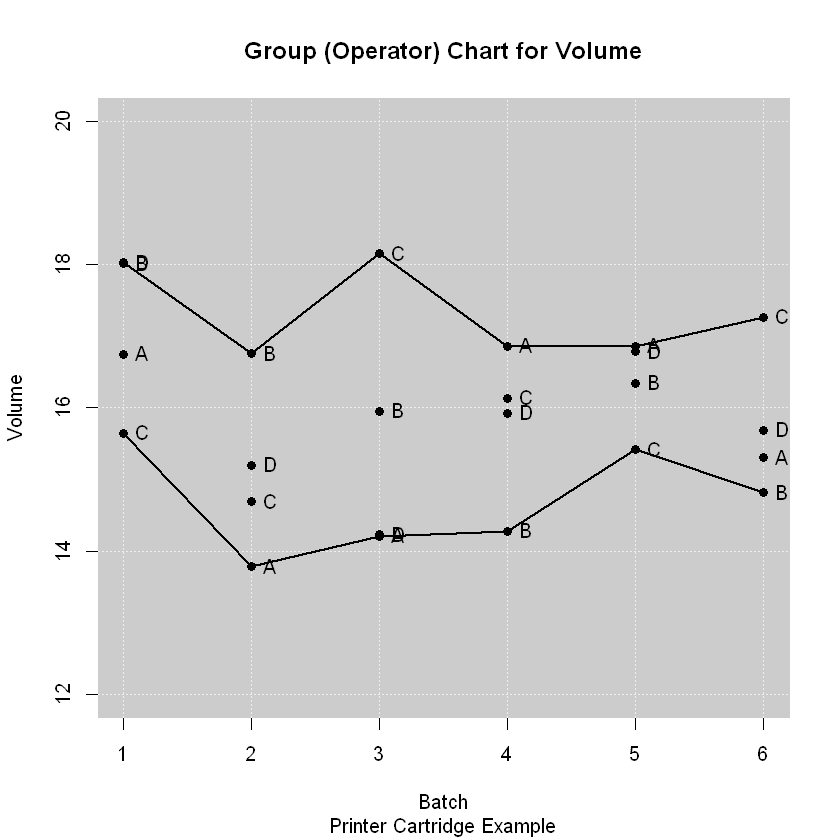

In [46]:
stripchart(pc.volume ~ pc.batch,
    vertical = TRUE,
    data = ss.data.pc,
    pch="",
    xlab = "Batch",
    ylab = "Volume",
    ylim = c(12,20),
    main = "Group (Operator) Chart for Volume",
    sub = "Printer Cartridge Example")
rect(par("usr")[1],
    par("usr")[3],
    par("usr")[2],
    par("usr")[4],
    col = "#CCCCCC")
box(col = "#CCCCCC")
grid(col = "#EEEEEE")
points(pc.volume ~ pc.batch,
    data = ss.data.pc,
    pch = 19)
with(ss.data.pc,
    text(label = pc.op,
    x = pc.batch,
    y = pc.volume,
    pos = 4))
lines(aggregate(pc.volume ~ pc.batch,
    data = ss.data.pc,
    max),
    lwd=2)
lines(aggregate(pc.volume ~ pc.batch,
    data = ss.data.pc,
    min),
    lwd=2)

In [47]:
str(ss.data.pc.big)

'data.frame':	72 obs. of  5 variables:
 $ filler  : Factor w/ 3 levels "1","2","3": 1 2 3 1 2 3 1 2 3 1 ...
 $ batch   : Factor w/ 4 levels "1","2","3","4": 1 1 1 2 2 2 3 3 3 4 ...
 $ col     : Factor w/ 2 levels "B","C": 1 1 1 1 1 1 1 1 1 1 ...
 $ operator: Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ volume  : num  16.8 18 15.6 18 13.8 ...


Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"

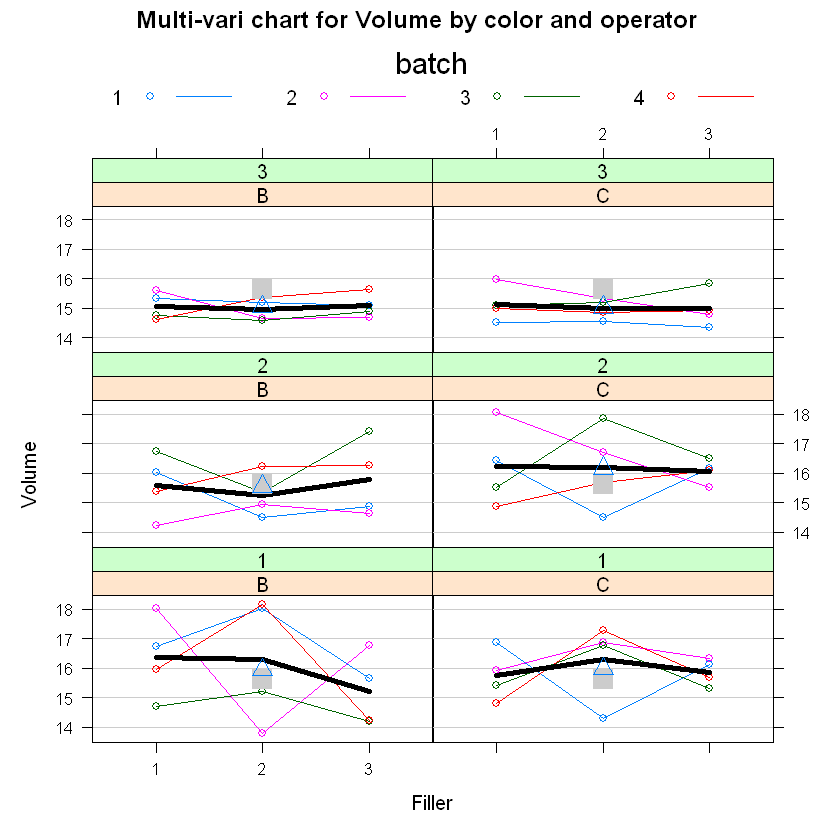

In [51]:
require(lattice)
#compute the overall mean
o.mean <- mean(ss.data.pc.big$volume)
mvChart <- xyplot (volume ~ filler | col * operator,
    main="Multi-vari chart for Volume by color and operator ",
    xlab = "Filler",
    ylab ="Volume",
    data = ss.data.pc.big,
    groups = batch,
    panel = function (x, y, ldots,
        groups, subscripts){
        #horizontal lines
        panel.grid(h = -1, v = 0,
        col = "#CCCCCC")
        #points and lines for the measurements
        panel.stripplot(x, y,
            groups = groups,
            subscripts = subscripts,
            type="b")
        #this line is for the mean of all the batches
        #for each color, operator and filler
        panel.linejoin(x, y,
            groups = groups,
            subscripts = subscripts,
            horizontal = FALSE,
            col = "#000000",
            type= "a",
            lwd= 4)
        #A square for the overall mean
        panel.points(mean(as.numeric(x)), o.mean,
            cex=2,
            pch=15,
            col = "#CCCCCC")
        #this is for the mean inside each sub-plot
        panel.points(mean(as.numeric(x)),mean(y),
            cex=1.5,
            pch=2)
    },
    #this is for the legend above the chart
    auto.key = list(title="batch",
        lines = TRUE,
        points = TRUE,
        columns = 4))
print(mvChart)

# Statistics and probability with R